# Structural Similarity in Images
# Machine Learning Project

Submitted by

18MCMI01 - Amrit Majumder

18MCMI05 - Delton M Antony

Importing the libraries

In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2 # conda install -c conda-forge opencv
# from PIL import Image # Not needed in this

Function to compute mean squared error between two images

In [2]:
# Mean Squared Error between two images
# Wont work if imageA and imageB dont have same dimension
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

Defining function to compare two images

In [3]:
def compare_images(imageA, imageB, title):
	m = mse(imageA, imageB) # for mean squared error
	s = ssim(imageA, imageB) # for structural similarity

	# setup the figure as subplots of imageA and imageB
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image on left
	ax = fig.add_subplot(1, 2, 1) # Here ax is to prevent the return to print in notebook
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off") # to turn off the x and y axes
	# show the second image on the right
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the subplot
	plt.show()

Loading the three example images - Here one is original, one is altered in terms of only contrast, and the last one is photoshopped with a transparent jurassic park logo overlapping the image.

In [4]:
# Load the images
original = cv2.imread("images/jp_gates_original.png")
contrast = cv2.imread("images/jp_gates_contrast.png")
shopped = cv2.imread("images/jp_gates_photoshopped.png")

Converting the image to grayscale as preprocessing step

In [5]:
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

Lets draw the three images side by side by using a subplot of three components

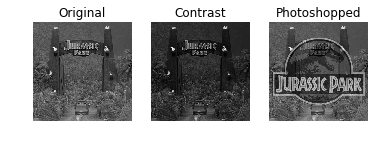

In [6]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original),("Contrast", contrast), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray) # without cmap set as gray, im getting cyan colortone
	plt.axis("off")
# show the figure
plt.show()

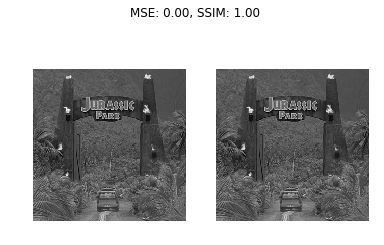

In [7]:
# compare the images
compare_images(original, original, "Original vs. Original")

From the above plot, we can see that when compared with itself, MSE will be zero and Structural Similarity will be maximum which is 1

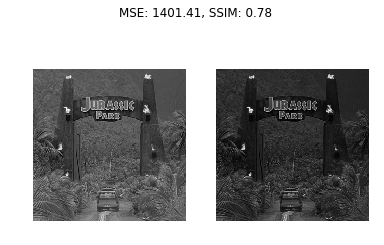

In [9]:
compare_images(original, contrast, "Original vs. Contrast")

From the above plot,
We can see that just a shift in contrast gives us a high error even though the images are the same. This is where structural similarity is a good metric to measure the similarity between images as it considers the interaction between pixels more than the pixels themselves. Here, the structural similarity measure is 0.78 which is quite high

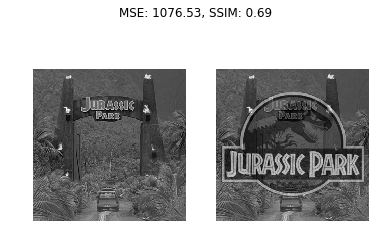

In [10]:
compare_images(original, shopped, "Original vs. Photoshopped")

As you can see here, the structural similarity measure decreased when the semi transparent logo appears above the image. Still a value of 0.69 shows that it is similar as the logo is on top of the image and it can still be seen underneath it.